# Mobile Price Classification using SVM

In [66]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

In [68]:
# Splitting the input features and target variable in the dataset (last column is the target variable)
X = data_set.iloc[:, :-1]
y = data_set.iloc[:, -1]

## Without Normalization

In [69]:
# Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Kernel

In [70]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier1 = SVC(kernel='linear')
y_train_pred1 = cross_val_predict(svm_classifier1, X_train, y_train, cv=5)

In [71]:
accuracy_cv1 = accuracy_score(y_train, y_train_pred1)
print('Training Accuracy (Without Normalization):',round(accuracy_cv1*100,2),'%')

Training Accuracy (Without Normalization): 97.25 %


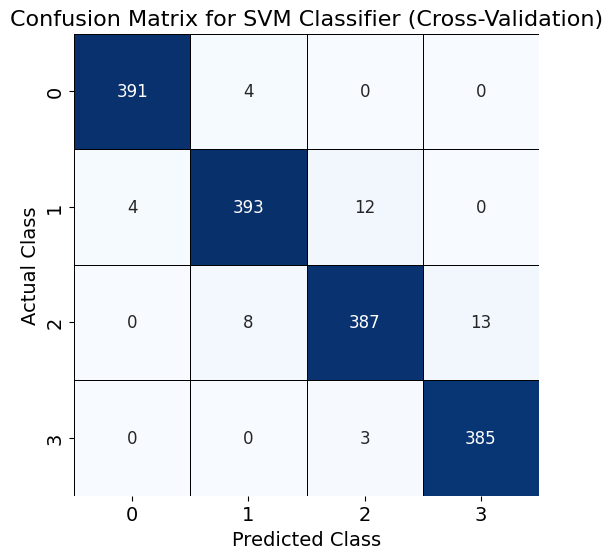

In [72]:
# Generating and plotting the confusion matrix
conf_matrix_cv1 = confusion_matrix(y_train, y_train_pred1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_cv1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Cross-Validation)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [73]:
# Making predictions on the test set
svm_classifier1.fit(X_train, y_train)
y_test_pred1 = svm_classifier1.predict(X_test)

In [74]:
# Evaluating the classifier on the test set
accuracy_test1 = accuracy_score(y_test, y_test_pred1)
print('Testing Accuracy (Without Normalization):',round(accuracy_test1*100,2),'%')

Testing Accuracy (Without Normalization): 97.0 %


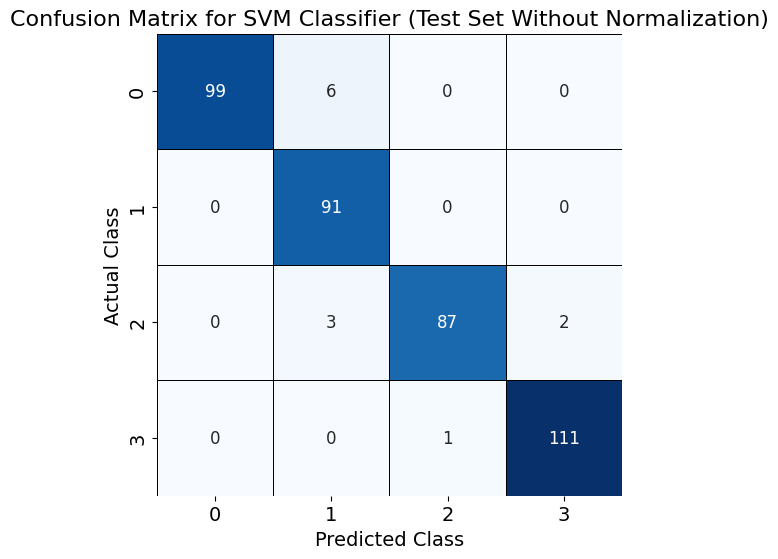

In [75]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test1 = confusion_matrix(y_test, y_test_pred1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier1.classes_, yticklabels=svm_classifier1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Polynomial Kernel

In [76]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier2 = SVC(kernel='poly')
y_train_pred2 = cross_val_predict(svm_classifier2, X_train, y_train, cv=5)

In [77]:
accuracy_cv2 = accuracy_score(y_train, y_train_pred2)
print('Training Accuracy (Without Normalization):',round(accuracy_cv2*100,2),'%')

Training Accuracy (Without Normalization): 95.44 %


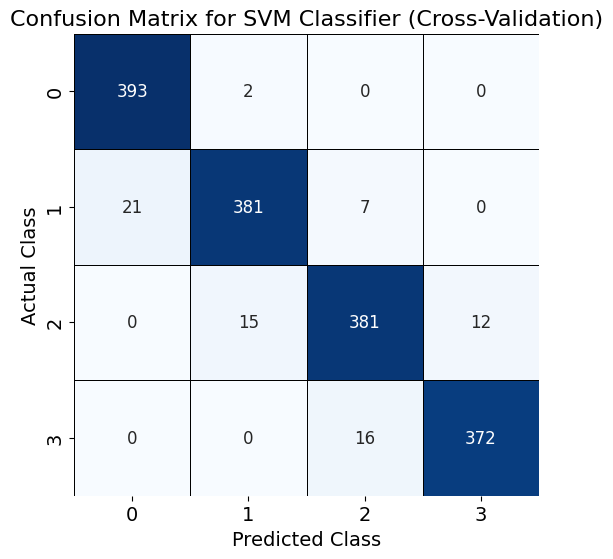

In [78]:
# Generating and plotting the confusion matrix
conf_matrix_cv2 = confusion_matrix(y_train, y_train_pred2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_cv2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Cross-Validation)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [79]:
# Making predictions on the test set
svm_classifier2.fit(X_train, y_train)
y_test_pred2 = svm_classifier2.predict(X_test)

In [80]:
# Evaluating the classifier on the test set
accuracy_test2 = accuracy_score(y_test, y_test_pred2)
print('Testing Accuracy (Without Normalization):',round(accuracy_test2*100,2),'%')

Testing Accuracy (Without Normalization): 96.25 %


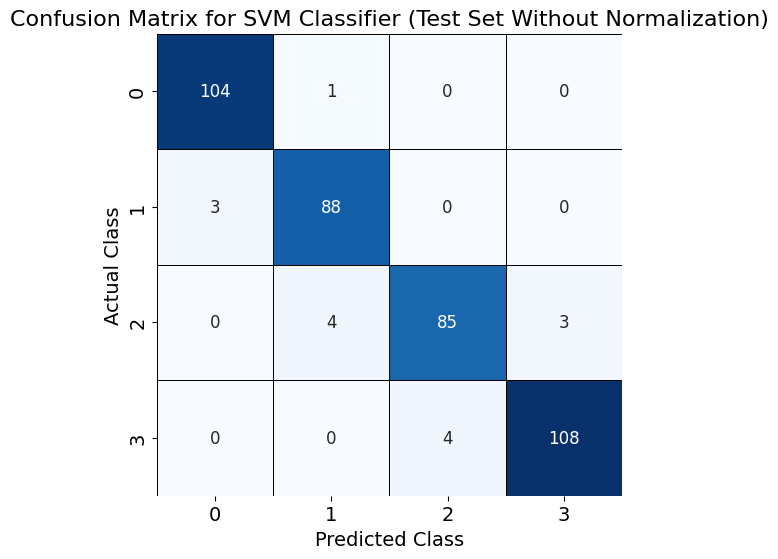

In [81]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test2 = confusion_matrix(y_test, y_test_pred2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier2.classes_, yticklabels=svm_classifier2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### RBF Kernel

In [82]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier3 = SVC(kernel='rbf')
y_train_pred3 = cross_val_predict(svm_classifier3, X_train, y_train, cv=5)

In [83]:
accuracy_cv3 = accuracy_score(y_train, y_train_pred3)
print('Training Accuracy (Without Normalization):',round(accuracy_cv3*100,2),'%')

Training Accuracy (Without Normalization): 95.19 %


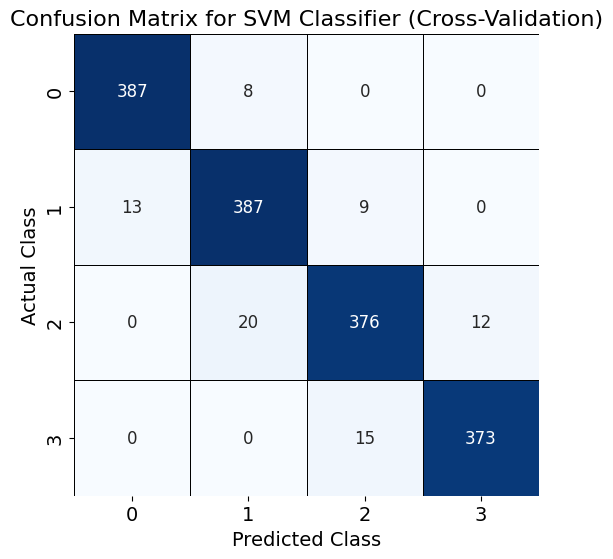

In [84]:
# Generating and plotting the confusion matrix
conf_matrix_cv3 = confusion_matrix(y_train, y_train_pred3)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_cv3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Cross-Validation)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [85]:
# Making predictions on the test set
svm_classifier3.fit(X_train, y_train)
y_test_pred3 = svm_classifier3.predict(X_test)

In [87]:
# Evaluating the classifier on the test set
accuracy_test3 = accuracy_score(y_test, y_test_pred3)
print('Testing Accuracy (Without Normalization):',round(accuracy_test3*100,2),'%')

Testing Accuracy (Without Normalization): 96.5 %


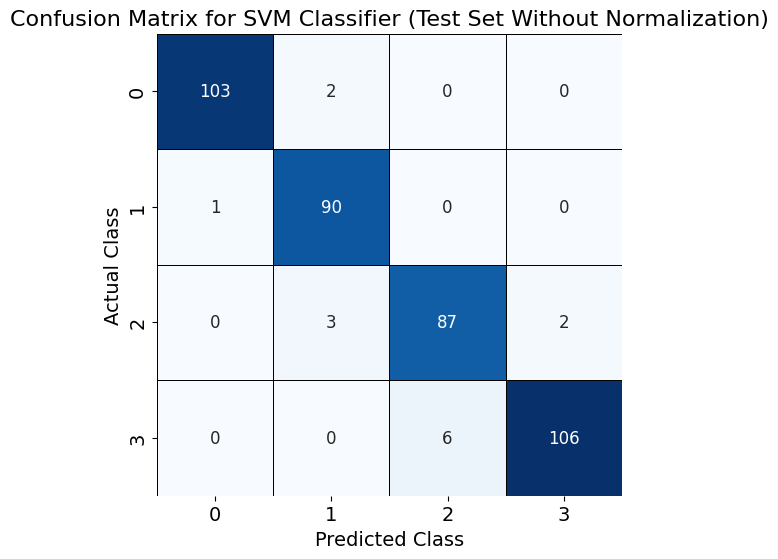

In [88]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test3 = confusion_matrix(y_test, y_test_pred3)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier3.classes_, yticklabels=svm_classifier3.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Sigmoid Kernel

In [89]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier4 = SVC(kernel='sigmoid')
y_train_pred4 = cross_val_predict(svm_classifier4, X_train, y_train, cv=5)

In [90]:
accuracy_cv4 = accuracy_score(y_train, y_train_pred4)
print('Training Accuracy (Without Normalization):',round(accuracy_cv4*100,2),'%')

Training Accuracy (Without Normalization): 19.75 %


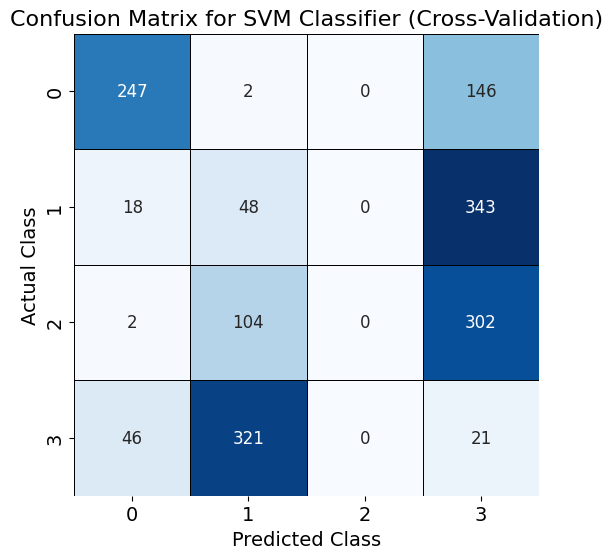

In [91]:
# Generating and plotting the confusion matrix
conf_matrix_cv4 = confusion_matrix(y_train, y_train_pred4)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_cv4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Cross-Validation)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [92]:
# Making predictions on the test set
svm_classifier4.fit(X_train, y_train)
y_test_pred4 = svm_classifier4.predict(X_test)

In [93]:
# Evaluating the classifier on the test set
accuracy_test4 = accuracy_score(y_test, y_test_pred4)
print('Testing Accuracy (Without Normalization):',round(accuracy_test4*100,2),'%')

Testing Accuracy (Without Normalization): 17.5 %


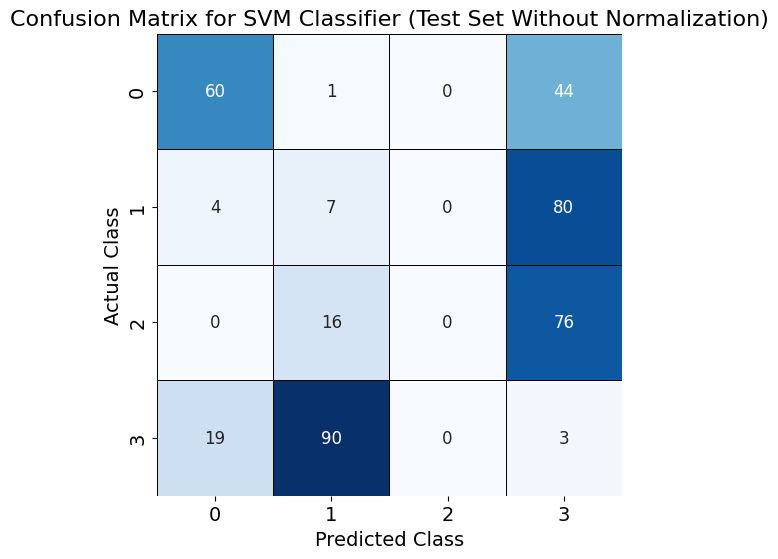

In [94]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test4 = confusion_matrix(y_test, y_test_pred4)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier4.classes_, yticklabels=svm_classifier4.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

## With Normalization

In [95]:
# Normalizing the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [96]:
# Splitting the dataset into training and testing sets
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

### Linear Kernel

In [97]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier5 = SVC(kernel='linear')
y_train_pred5 = cross_val_predict(svm_classifier5, X_train_normalized, y_train, cv=5)

In [98]:
accuracy_cv5 = accuracy_score(y_train, y_train_pred5)
print('Training Accuracy (With Normalization):',round(accuracy_cv5*100,2),'%')

Training Accuracy (With Normalization): 95.38 %


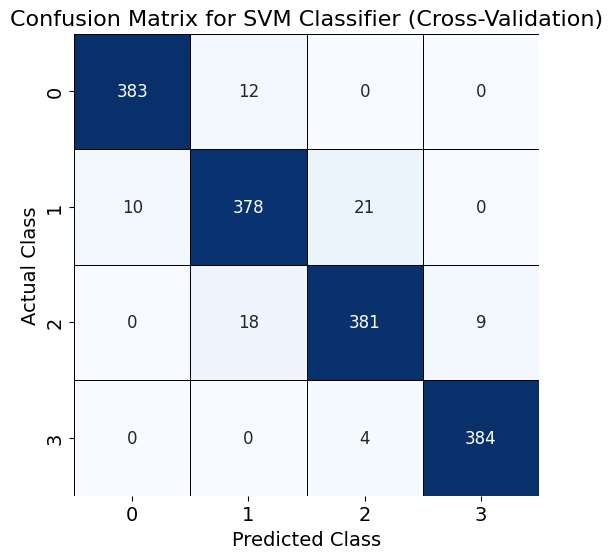

In [99]:
# Generating and plotting the confusion matrix
conf_matrix_cv5 = confusion_matrix(y_train, y_train_pred5)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_cv5, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Cross-Validation)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [100]:
# Making predictions on the test set
svm_classifier5.fit(X_train_normalized, y_train)
y_test_pred5 = svm_classifier5.predict(X_test_normalized)

In [101]:
# Evaluating the classifier on the test set
accuracy_test5 = accuracy_score(y_test, y_test_pred5)
print('Testing Accuracy (With Normalization):',round(accuracy_test5*100,2),'%')

Testing Accuracy (With Normalization): 97.0 %


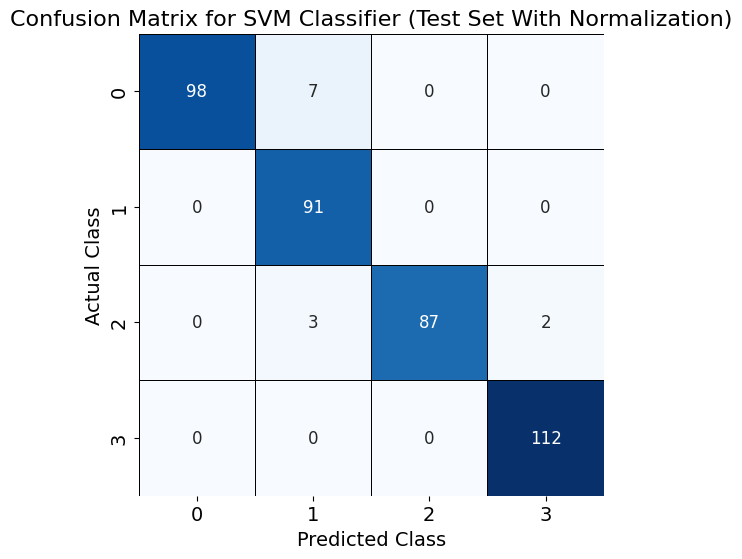

In [102]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test5 = confusion_matrix(y_test, y_test_pred5)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test5, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier5.classes_, yticklabels=svm_classifier5.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Polynomial Kernel

In [103]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier6 = SVC(kernel='poly')
y_train_pred6 = cross_val_predict(svm_classifier6, X_train_normalized, y_train, cv=5)

In [104]:
accuracy_cv6 = accuracy_score(y_train, y_train_pred6)
print('Training Accuracy (With Normalization):',round(accuracy_cv6*100,2),'%')

Training Accuracy (With Normalization): 75.62 %


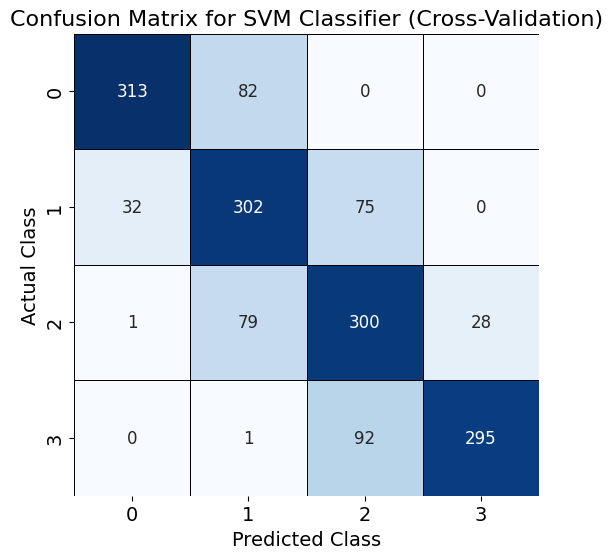

In [105]:
# Generating and plotting the confusion matrix
conf_matrix_cv6 = confusion_matrix(y_train, y_train_pred6)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_cv6, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Cross-Validation)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [106]:
# Making predictions on the test set
svm_classifier6.fit(X_train_normalized, y_train)
y_test_pred6 = svm_classifier6.predict(X_test_normalized)

In [107]:
# Evaluating the classifier on the test set
accuracy_test6 = accuracy_score(y_test, y_test_pred6)
print('Testing Accuracy (With Normalization):',round(accuracy_test6*100,2),'%')

Testing Accuracy (With Normalization): 78.75 %


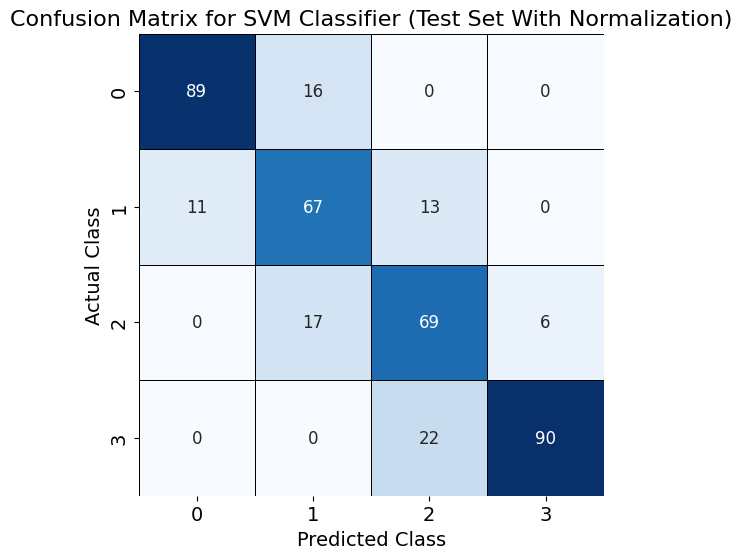

In [108]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test6 = confusion_matrix(y_test, y_test_pred6)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test6, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier6.classes_, yticklabels=svm_classifier6.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### RBF Kernel

In [109]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier7 = SVC(kernel='rbf')
y_train_pred7 = cross_val_predict(svm_classifier7, X_train_normalized, y_train, cv=5)

In [110]:
accuracy_cv7 = accuracy_score(y_train, y_train_pred7)
print('Training Accuracy (With Normalization):',round(accuracy_cv7*100,2),'%')

Training Accuracy (With Normalization): 86.44 %


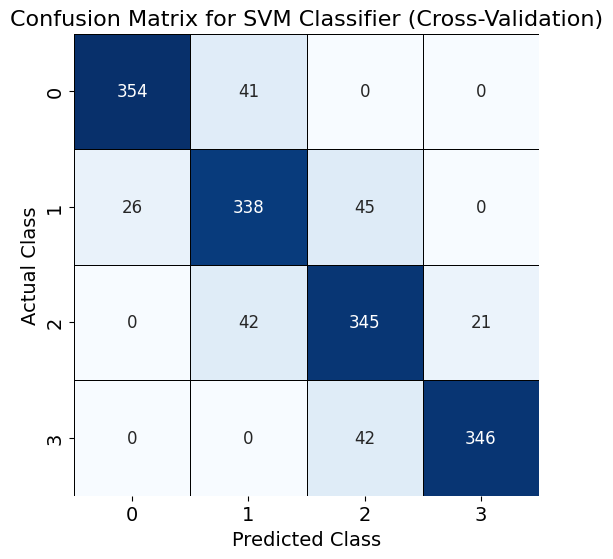

In [111]:
# Generating and plotting the confusion matrix
conf_matrix_cv7 = confusion_matrix(y_train, y_train_pred7)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_cv7, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Cross-Validation)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [112]:
# Making predictions on the test set
svm_classifier7.fit(X_train_normalized, y_train)
y_test_pred7 = svm_classifier7.predict(X_test_normalized)

In [113]:
# Evaluating the classifier on the test set
accuracy_test7 = accuracy_score(y_test, y_test_pred7)
print('Testing Accuracy (With Normalization):',round(accuracy_test7*100,2),'%')

Testing Accuracy (With Normalization): 89.25 %


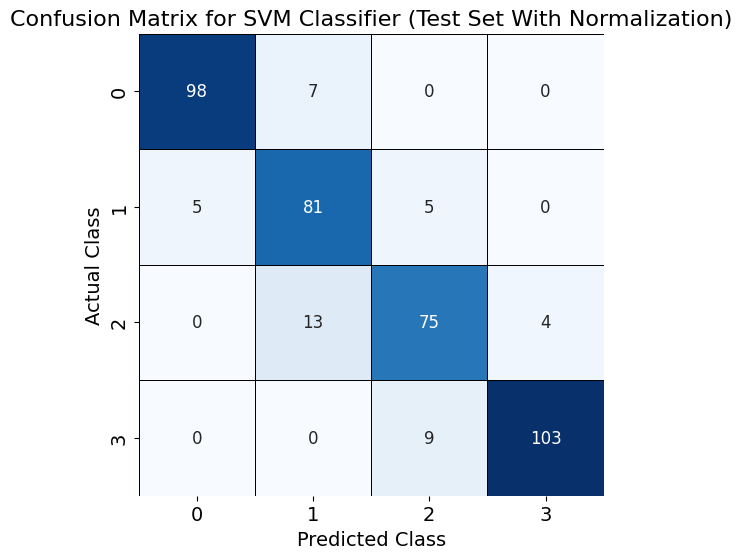

In [114]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test7 = confusion_matrix(y_test, y_test_pred7)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test7, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier7.classes_, yticklabels=svm_classifier7.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### Sigmoid Kernel

In [115]:
# Initializing and training the SVM classifier (Cross Validation)
svm_classifier8 = SVC(kernel='sigmoid')
y_train_pred8 = cross_val_predict(svm_classifier8, X_train_normalized, y_train, cv=5)

In [116]:
accuracy_cv8 = accuracy_score(y_train, y_train_pred8)
print('Training Accuracy (With Normalization):',round(accuracy_cv8*100,2),'%')

Training Accuracy (With Normalization): 91.12 %


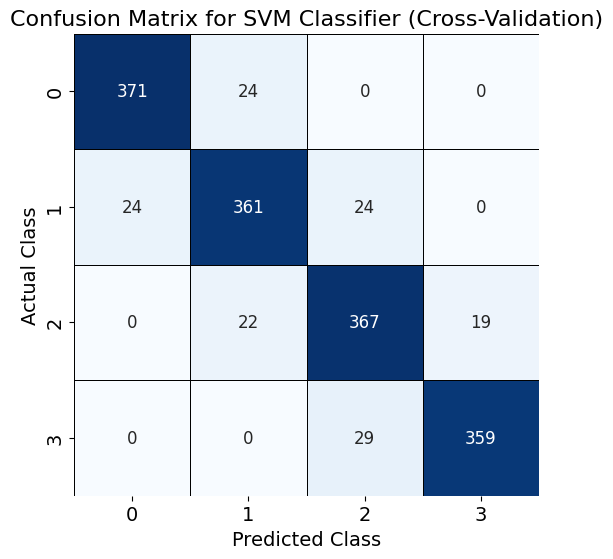

In [117]:
# Generating and plotting the confusion matrix
conf_matrix_cv8 = confusion_matrix(y_train, y_train_pred8)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_cv8, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Cross-Validation)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [118]:
# Making predictions on the test set
svm_classifier8.fit(X_train_normalized, y_train)
y_test_pred8 = svm_classifier8.predict(X_test_normalized)

In [119]:
# Evaluating the classifier on the test set
accuracy_test8 = accuracy_score(y_test, y_test_pred8)
print('Testing Accuracy (With Normalization):',round(accuracy_test8*100,2),'%')

Testing Accuracy (With Normalization): 92.25 %


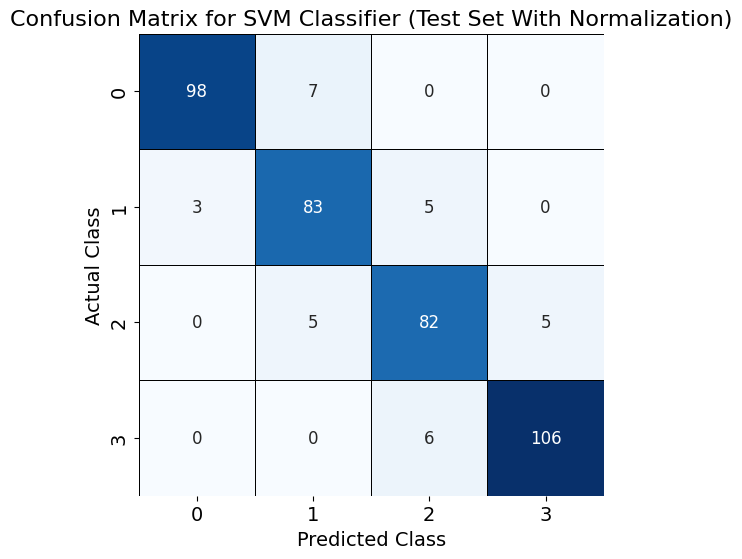

In [120]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test8 = confusion_matrix(y_test, y_test_pred8)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test8, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=svm_classifier8.classes_, yticklabels=svm_classifier8.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for SVM Classifier (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

***